## Homework Linear Regression

- The dataset you are working is Boston Housing Price

- The Boston_Housing_Prices dataset is a famous dataset usually used for learning or benchmarking regression techniques. This dataset contains 14 variables, one of which (MEDV, median value of home) we'll use as the target. 

- For this assignment, your task is to:

1- Read in the dataset using sklearn's load_boston() function (found in sklearn.datasets) 

2- Perform some basic exploratory data analysis to get a feel for the data. Graph some stuff! 

3- Create a correlation heatmap to check to see how highly correlated our predictor variables (features) are (Remember, if our predictors are highly correlated, this is bad.)

4- Train the model based on the train set. Use 75 percent of the data for train part. Use 25 percent of the data for test part.

Hint: `from sklearn.model_selection import train_test_split`

Hint: `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)`

5 -Make predictions on your test set (X_test) and see how well it compares to the actual targets (y_test) from the test set.

6- Compute, Mean-Square-Error (MSE) and R Squared score of your Model 

Hint: `from sklearn.metrics import r2_score`

Hint: `from sklearn.metrics import mean_squared_error`

In [60]:
# import the load_boston() function from sklearn.datasets
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

print(boston.data)
print(boston.data.shape)

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['MEDV'] = boston.target

bos.head()

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


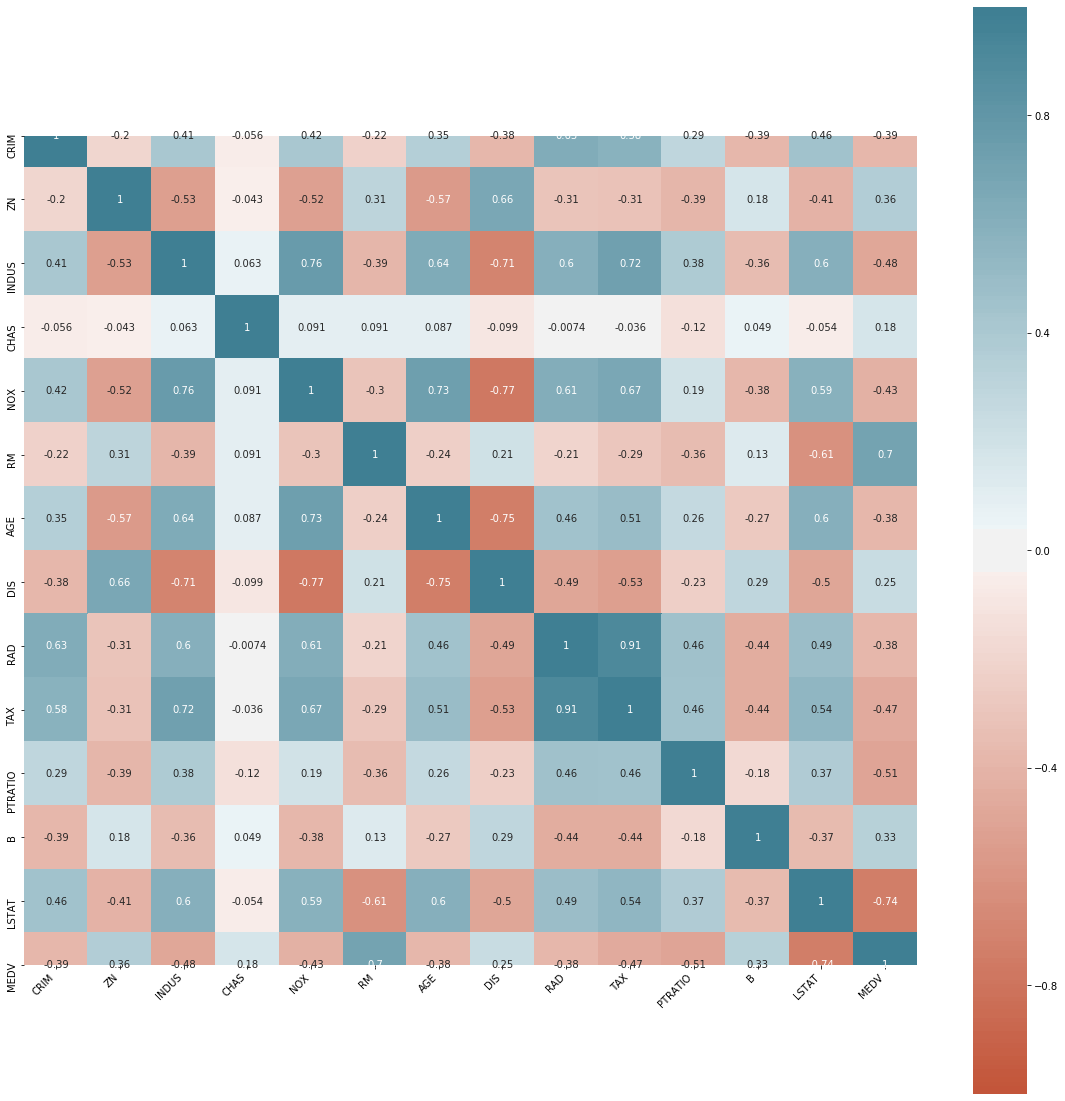

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt 

corr = bos.corr()

plt.figure(figsize = (20,20))

ax = sns.heatmap(
    corr,
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# setting predictor (X) and target (y) variables
X = bos[boston.feature_names]
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

medv_reg = LinearRegression()
medv_reg.fit(X_train, y_train)
print(medv_reg.predict(X_test))
print(medv_reg.score(X_test, y_test))


[24.95233283 23.61699724 29.20588553 11.96070515 21.33362042 19.46954895
 20.42228421 21.52044058 18.98954101 19.950983    4.92468244 16.09694058
 16.93599574  5.33508402 39.84434398 32.33549843 22.32772572 36.54017819
 31.03300611 23.32172503 24.92086498 24.26106474 20.71504422 30.45072552
 22.45009234  9.87470006 17.70324412 17.974775   35.69932012 20.7940972
 18.10554174 17.68317865 19.71354713 23.79693873 29.06528958 19.23738284
 10.97815878 24.56199978 17.32913052 15.20340817 26.09337458 20.87706795
 22.26187518 15.32582693 22.85847963 25.08887173 19.74138819 22.70744911
  9.66708558 24.46175926 20.72654169 17.52545047 24.45596997 30.10668865
 13.31250981 21.52052342 20.65642932 15.34285652 13.7741129  22.07429287
 17.53293957 21.60707766 32.91050188 31.32796114 17.64346364 32.69909854
 18.56579207 19.32110821 18.81256692 23.04351442 22.81649956 23.99800754
 30.62733254 28.8662207  25.78198145  5.00689605 36.83409088 23.80490328
 27.36965299 19.33057146 28.51439846 19.19147448 18.

## Make predictions on test set (X_test)

Text(0.5, 1.0, 'Actual vs. Predict Median Value of Home')

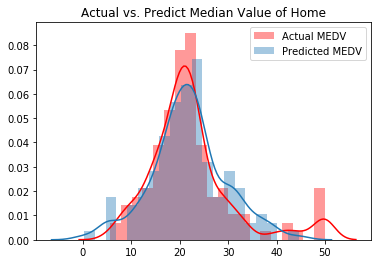

In [109]:
y_pred = LinearRegression().fit(X_train, y_train).predict(X_test)
sns.distplot(y_test, kde=True, color='red', bins=20, label='Actual MEDV')
sns.distplot(y_pred, kde=True, bins=20, label='Predicted MEDV')
plt.legend()
plt.title('Actual vs. Predict Median Value of Home')


## Compute Mean-Square-Error (MSE) and R Squared score 



In [110]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print(f"==> Coefficient: {reg.coef_}")
print(f"==> Y-intercept: {reg.intercept_}")



==> Coefficient: [-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]
==> Y-intercept: 36.93325545711978


### R-squared

In [111]:
from sklearn.metrics import r2_score, mean_squared_error

y_predict = reg.predict(X_test)
print(r2_score(y_test, y_predict))



0.6354638433202124


### MSE

In [112]:
print(mean_squared_error(y_test, y_predict))

29.7822450923024


## Apply data normalization (Scaling) to improve the prediction result

- Use StandardScaler and then train your Linear Regression Model. Comapre the R Square score with previous one you got

- Use MinMaxScaler and then train your Linear Regression Model. Comapre the R Square score with previous one you got

- Watch this video: https://www.youtube.com/watch?v=YKP31T5LIXQ

In [113]:
from sklearn.pipeline import make_pipeline
import time

def build_model_for_data(data, target):
    X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=2)
    pipline = make_pipeline(LinearRegression())
    model = timer(lambda: pipeline.fit(X_train, y_train))
    return (X_test, y_test, model)

### Use StandardScaler to train Linear Regression Model

In [114]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.linear_model import LinearRegression

standard_scaler = StandardScaler()
X_ss = standard_scaler.fit_transform(boston.data)
# print(X_ss)
X_train, X_test, y_train, y_test = train_test_split(X_ss, boston.target, test_size=0.25, random_state=0)


reg = LinearRegression()
reg.fit(X_train, y_train)
print("Printing the coefficient and y intercept:")
print(f"==> Coefficient: {reg.coef_}")
print(f"==> Y-intercept: {reg.intercept_}")

print("--------------------------------------------------------")
print(f'Model r^2-score: {r2_score(y_test, reg.predict(X_test))}')

Printing the coefficient and y intercept:
==> Coefficient: [-1.01170421  1.02558108 -0.03953238  0.60731239 -1.80467996  2.64552328
 -0.19783648 -3.018615    2.0883816  -1.90212879 -2.13154559  0.77017134
 -3.56070005]
==> Y-intercept: 22.408806103291376
--------------------------------------------------------
Model r^2-score: 0.6354638433202131


### Use MinMaxScaler to train Leaner Regression Model

In [115]:
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(boston.data)

X_train, X_test, y_train, y_test = train_test_split(X_minmax, boston.target, test_size=0.25, random_state=0)


reg = LinearRegression()
reg.fit(X_train, y_train)
print("Printing the coefficient and y intercept:")
print(f"==> Coefficient: {reg.coef_}")
print(f"==> Y-intercept: {reg.intercept_}")

print("--------------------------------------------------------")
print(f'Model r^2-score: {r2_score(y_test, reg.predict(X_test))}')

Printing the coefficient and y intercept:
==> Coefficient: [-10.47489456   4.40174969  -0.15735494   2.39341594  -7.57645867
  19.67024242  -0.68311581 -15.78007218   5.52186497  -5.91977522
  -9.26413928   3.34889385 -18.08799274]
==> Y-intercept: 27.556726963986343
--------------------------------------------------------
Model r^2-score: 0.6354638433202122
